clock hands


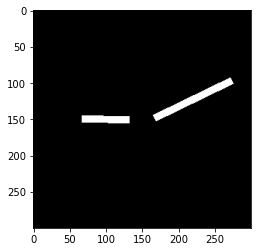

hr hand


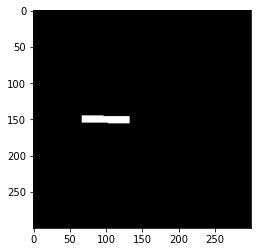

minute hand


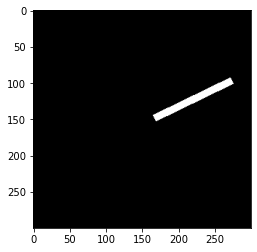

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import math

img=cv2.imread('clock0910.png',0) # you can change to 'clock0400.png', you can change to 'clock0900.png',  you can change to 'clock1000.png'
img=((img<125))*255

def band_eclipse_erase(img,inner,outer):
  nx, ny = img.shape
  y = np.linspace(-nx/2,nx/2,nx)
  x = np.linspace(-ny/2,ny/2,ny)
  xv, yv = np.meshgrid(x,y) 
  radiusCoor = np.sqrt(xv**2 + yv**2)
  r1 = radiusCoor < inner
  r2 = radiusCoor >= outer
  mask1 = np.ones([nx,ny])
  return cv2.bitwise_or(r1.astype(np.uint8),r2.astype(np.uint8),mask=mask1.astype(np.uint8))



####### Crop the clock picture to focus only min hand and hr hand #########

clock_hands=(img-img*band_eclipse_erase(img,15,140))
clock_hands=np.uint8(clock_hands)

print('clock hands')
plt.imshow(clock_hands,cmap='gray') ### crop filter
plt.show()

output=cv2.connectedComponentsWithStats(clock_hands,8,cv2.CV_32S)

####### Extract min hand and hr hand from threshold clock picture ########

min_hand=np.zeros(clock_hands.shape)
hr_hand=np.zeros(clock_hands.shape)

if(np.sum(output[1]==1)>np.sum(output[1]==2)):
  hr_hand=output[1]==2
  min_hand=output[1]==1
else :
  hr_hand=output[1]==1
  min_hand=output[1]==2

hr_hand=hr_hand*255
min_hand=min_hand*255

print('hr hand')
plt.imshow(hr_hand,cmap='gray')
plt.show()
print('minute hand')
plt.imshow(min_hand,cmap='gray')
plt.show()

hr Canny


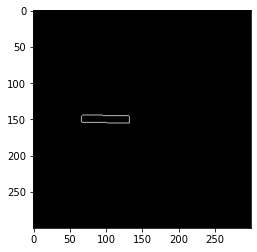

minute Canny


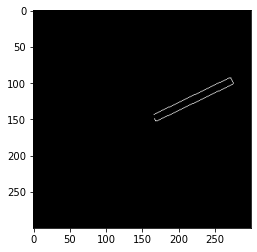

In [10]:
hr_hand=np.uint8(hr_hand)
min_hand=np.uint8(min_hand)
edges_hr= cv2.Canny(hr_hand,50,150,apertureSize = 3)
edges_min= cv2.Canny(min_hand,50,150,apertureSize = 3)
edges_hr=edges_hr-edges_hr*band_eclipse_erase(edges_hr,17,137)
edges_min=edges_min-edges_min*band_eclipse_erase(edges_min,17,137)




print('hr Canny')
plt.imshow(edges_hr,cmap='gray')
plt.show()
print('minute Canny')
plt.imshow(edges_min,cmap='gray')
plt.show()




In [11]:
######## find degree for hour
lines_hr = cv2.HoughLines(edges_hr,10,np.pi/180,50)
linesdegree = lines_hr.copy()
linesdegree[:,0:1,1:2] =linesdegree[:,0:1,1:2]*180/np.pi
hr_degree=linesdegree[0][0,1]


######## find degree for min

lines_min = cv2.HoughLines(edges_min,10,np.pi/180,50)
linesdegree = lines_min.copy()
linesdegree[:,0:1,1:2] =linesdegree[:,0:1,1:2]*180/np.pi
min_degree=linesdegree[0][0,1]

def real_angle(angle,edge):
    left=edge[:,:edge.shape[1]//2]
    right=edge[:,edge.shape[1]//2:]
    top=edge[:edge.shape[0]//2,:]
    bottom=edge[edge.shape[0]//2:,:]

    if(0<=angle<80): 
        if(np.sum(bottom)>np.sum(top)):
            angle+=180
    elif 100<angle<180:
        if(np.sum(top)>np.sum(bottom)):
            angle+=180
    elif 80<=angle<=100:
        if(np.sum(left)>np.sum(right)):
            angle+=180
    return angle
#print('hour',real_angle(hr_degree,edges_hr))
#print('min',real_angle(min_degree,edges_min))

time_hr=round(real_angle(hr_degree,edges_hr)/30)
time_min=round(real_angle(min_degree,edges_min)/6)
def t_fmt(n):
    if(n<10):
        return '0'+str(n)
    return str(n)
print(t_fmt(time_hr)+':'+t_fmt(time_min))

09:10
